Development image size: (1848, 1848)
Nightlight image size: (239, 276)

Pearson correlation: 0.1825, p-value: 0.0000
Spearman correlation: 0.1573, p-value: 0.0000


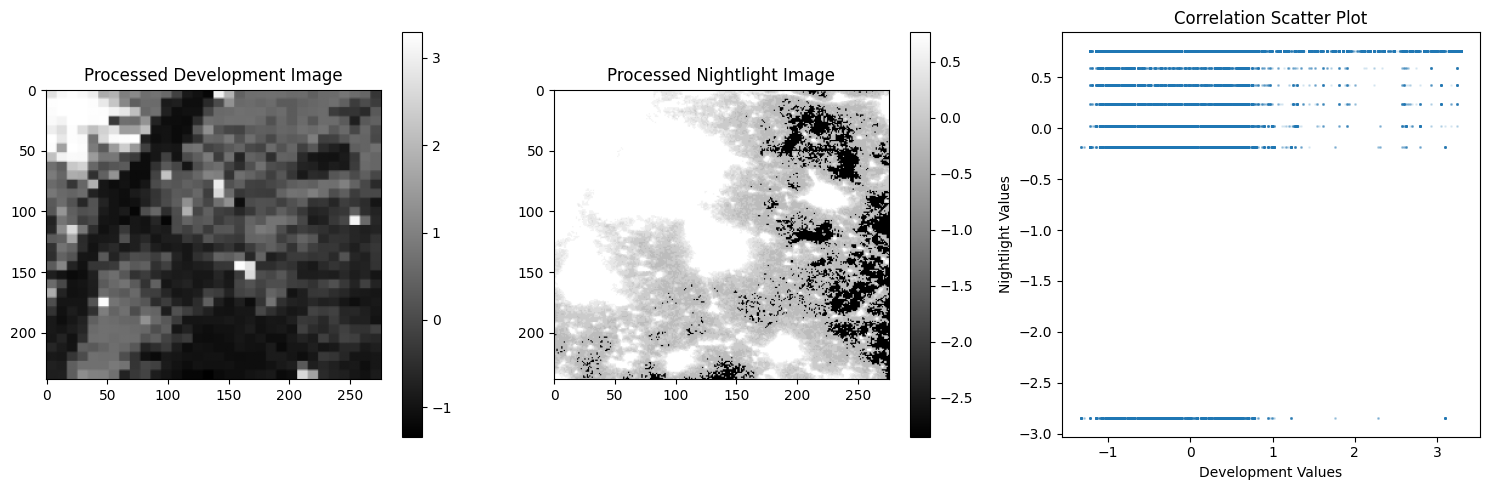


Statistics:
Development value range: [-1.3360, 3.2923]
Nightlight value range: [-2.8491, 0.7606]
Development mean: 0.0000
Nightlight mean: -0.0000
Development std: 1.0000
Nightlight std: 1.0000


In [6]:
import numpy as np
from PIL import Image
import cv2
from scipy import stats
import matplotlib.pyplot as plt

# Read PNG images 
development_img = Image.open('48RVU.png')
nightlight_img = Image.open('48rvu1.png')

# Convert to numpy arrays
development_array = np.array(development_img)
nightlight_array = np.array(nightlight_img)

# Convert to grayscale if RGB
if len(development_array.shape) == 3:
    development_array = cv2.cvtColor(development_array, cv2.COLOR_RGB2GRAY)
if len(nightlight_array.shape) == 3:
    nightlight_array = cv2.cvtColor(nightlight_array, cv2.COLOR_RGB2GRAY)

# Print original image sizes
print(f"Development image size: {development_array.shape}")
print(f"Nightlight image size: {nightlight_array.shape}")

# Resize development image to match nightlight image size
nightlight_size = nightlight_array.shape[:2]
development_resized = cv2.resize(development_array, (nightlight_size[1], nightlight_size[0]), 
                               interpolation=cv2.INTER_AREA)

# Normalize function
def normalize(array):
    return (array - np.min(array)) / (np.max(array) - np.min(array))

# Standardize function
def standardize(array):
    return (array - np.mean(array)) / np.std(array)

# Normalize and standardize both arrays
development_normalized = normalize(development_resized)
nightlight_normalized = normalize(nightlight_array)

development_standardized = standardize(development_normalized)
nightlight_standardized = standardize(nightlight_normalized)

# Calculate Pearson correlation
correlation_pearson = stats.pearsonr(development_standardized.flatten(), 
                                   nightlight_standardized.flatten())

# Calculate Spearman correlation
correlation_spearman = stats.spearmanr(development_standardized.flatten(), 
                                      nightlight_standardized.flatten())

print(f"\nPearson correlation: {correlation_pearson[0]:.4f}, p-value: {correlation_pearson[1]:.4f}")
print(f"Spearman correlation: {correlation_spearman[0]:.4f}, p-value: {correlation_spearman[1]:.4f}")

# Visualize processed images
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(development_standardized, cmap='gray')
plt.title('Processed Development Image')
plt.colorbar()

plt.subplot(132)
plt.imshow(nightlight_standardized, cmap='gray')
plt.title('Processed Nightlight Image')
plt.colorbar()

plt.subplot(133)
plt.scatter(development_standardized.flatten(), nightlight_standardized.flatten(), 
           alpha=0.1, s=1)
plt.xlabel('Development Values')
plt.ylabel('Nightlight Values')
plt.title('Correlation Scatter Plot')

plt.tight_layout()
plt.show()

# Additional statistics
print("\nStatistics:")
print(f"Development value range: [{development_standardized.min():.4f}, {development_standardized.max():.4f}]")
print(f"Nightlight value range: [{nightlight_standardized.min():.4f}, {nightlight_standardized.max():.4f}]")
print(f"Development mean: {development_standardized.mean():.4f}")
print(f"Nightlight mean: {nightlight_standardized.mean():.4f}")
print(f"Development std: {development_standardized.std():.4f}")
print(f"Nightlight std: {nightlight_standardized.std():.4f}")

Development image size: (1848, 1848)
Nightlight image size: (239, 267)

Pearson correlation: 0.4183, p-value: 0.0000
Spearman correlation: 0.3499, p-value: 0.0000


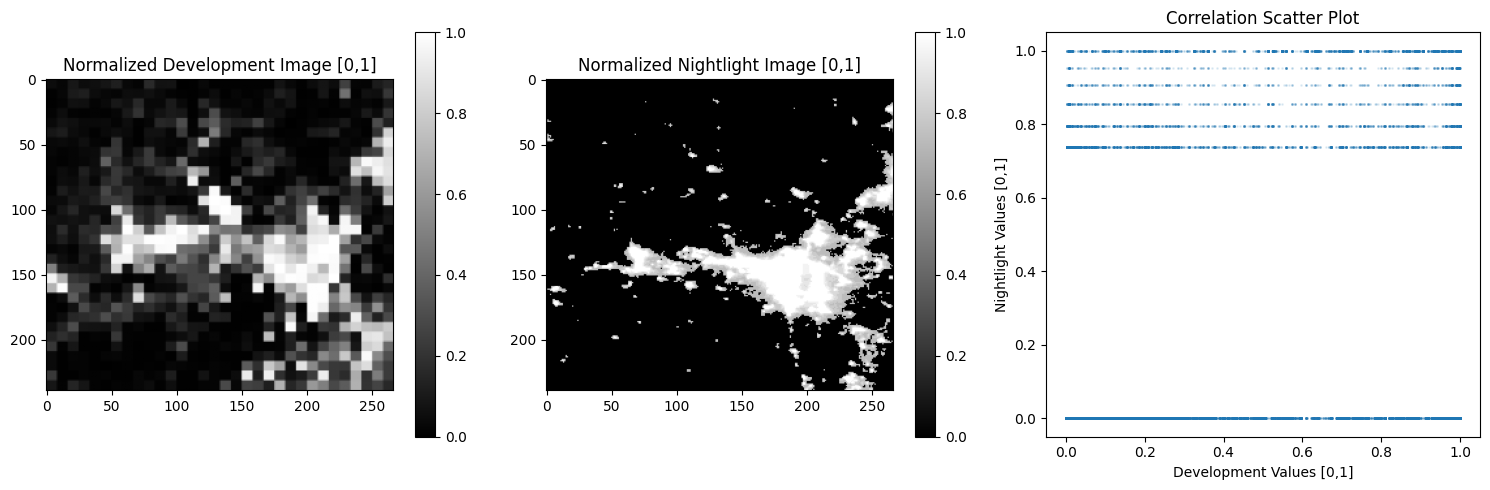


Statistics:
Development value range: [0.0000, 1.0000]
Nightlight value range: [0.0000, 1.0000]
Development mean: 0.2298
Nightlight mean: 0.1366
Development std: 0.2944
Nightlight std: 0.3187


In [7]:
import numpy as np
from PIL import Image
import cv2
from scipy import stats
import matplotlib.pyplot as plt

# Read PNG images 
development_img = Image.open('47RQK.png')
nightlight_img = Image.open('47rqk2.png')

# Convert to numpy arrays
development_array = np.array(development_img)
nightlight_array = np.array(nightlight_img)

# Convert to grayscale if RGB
if len(development_array.shape) == 3:
    development_array = cv2.cvtColor(development_array, cv2.COLOR_RGB2GRAY)
if len(nightlight_array.shape) == 3:
    nightlight_array = cv2.cvtColor(nightlight_array, cv2.COLOR_RGB2GRAY)

# Print original image sizes
print(f"Development image size: {development_array.shape}")
print(f"Nightlight image size: {nightlight_array.shape}")

# Resize development image to match nightlight image size
nightlight_size = nightlight_array.shape[:2]
development_resized = cv2.resize(development_array, (nightlight_size[1], nightlight_size[0]), 
                               interpolation=cv2.INTER_AREA)

# Normalize function to [0,1]
def normalize_0_1(array):
    return (array - np.min(array)) / (np.max(array) - np.min(array))

# Normalize both arrays to [0,1]
development_normalized = normalize_0_1(development_resized)
nightlight_normalized = normalize_0_1(nightlight_array)

# Calculate Pearson correlation
correlation_pearson = stats.pearsonr(development_normalized.flatten(), 
                                   nightlight_normalized.flatten())

# Calculate Spearman correlation
correlation_spearman = stats.spearmanr(development_normalized.flatten(), 
                                      nightlight_normalized.flatten())

print(f"\nPearson correlation: {correlation_pearson[0]:.4f}, p-value: {correlation_pearson[1]:.4f}")
print(f"Spearman correlation: {correlation_spearman[0]:.4f}, p-value: {correlation_spearman[1]:.4f}")

# Visualize processed images
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(development_normalized, cmap='gray')
plt.title('Normalized Development Image [0,1]')
plt.colorbar()

plt.subplot(132)
plt.imshow(nightlight_normalized, cmap='gray')
plt.title('Normalized Nightlight Image [0,1]')
plt.colorbar()

plt.subplot(133)
plt.scatter(development_normalized.flatten(), nightlight_normalized.flatten(), 
           alpha=0.1, s=1)
plt.xlabel('Development Values [0,1]')
plt.ylabel('Nightlight Values [0,1]')
plt.title('Correlation Scatter Plot')

plt.tight_layout()
plt.show()

# Additional statistics
print("\nStatistics:")
print(f"Development value range: [{development_normalized.min():.4f}, {development_normalized.max():.4f}]")
print(f"Nightlight value range: [{nightlight_normalized.min():.4f}, {nightlight_normalized.max():.4f}]")
print(f"Development mean: {development_normalized.mean():.4f}")
print(f"Nightlight mean: {nightlight_normalized.mean():.4f}")
print(f"Development std: {development_normalized.std():.4f}")
print(f"Nightlight std: {nightlight_normalized.std():.4f}")